In [92]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv

main_df = pd.read_csv("s207 - Sheet1.csv")

In [93]:
id = []
for i in range(len(main_df)):
    id.append(i)
main_df["ID"] = id

In [94]:
num_of_peaks = 50
main_df.head()

,Signal1,Signal2,ID
0,31,68,0
1,19,70,1
2,0,78,2
3,10,82,3
4,19,79,4


In [95]:
len(main_df)

37642

In [96]:
len(main_df)

37642

In [97]:
avg = main_df["Signal1"].mean()
print("Average1 :",avg)
avg2 = main_df["Signal2"].mean()
print("Average2:",avg2)

Average1 : 29.546570320386802
Average2: 44.83374953509378


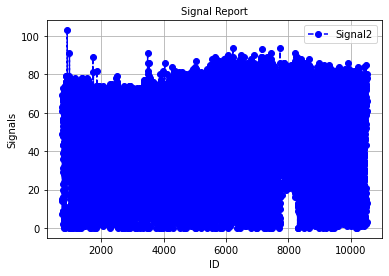

In [98]:
import csv
  
x = []
y1 = []
y2 = []
  
for i in range(754,10508):
    x.append(main_df["ID"][i])
    y1.append(main_df["Signal1"][i])
    y2.append(main_df["Signal2"][i])

  
  
plt.plot(x, y2, color = 'b', linestyle = 'dashed',
         marker = 'o',label = "Signal2")
  
plt.xlabel('ID')
plt.ylabel('Signals')
plt.title('Signal Report', fontsize = 10)
plt.grid()
plt.legend()
plt.show()


In [99]:
for i in range(len(main_df)):
    if(main_df.at[i,'Signal1']<avg and main_df.at[i,'Signal2']<avg2):
        main_df = main_df.drop(index = i)
        #print(i)

In [100]:
id = []
for i in range(len(main_df)):
    id.append(i)
main_df["ID"] = id

In [101]:
main_df.set_index("ID", inplace = True)
main_df.head()


,Signal1,Signal2
ID,,
0,31,68
1,19,70
2,0,78
3,10,82
4,19,79


In [102]:
len(main_df)

27153

Saving the raw data in a file

main_df.to_csv("f051ff_raw.csv")

In [103]:
limit = int(len(main_df)/num_of_peaks)
rms_id = []
rms_values = []
mean_values = []
kurtosis_values = []
sd_values = []
skew_values = []
rms_values2 = []
mean_values2 = []
kurtosis_values2 = []
sd_values2 = []
skew_values2 = []

In [104]:
for i in range(num_of_peaks):
    rms_id.append(i)  

In [105]:
from scipy import stats
from scipy.stats import kurtosis
for i in range(num_of_peaks):
    val = 0
    mean = 0
    val2 = 0
    mean2 = 0
    part_data_s1 = []
    part_data_s2 = []
    for j in range(limit):
        val = val + (main_df.at[i+j, 'Signal1'])*(main_df.at[i+j, 'Signal1'])
        mean = mean + (main_df.at[i+j, 'Signal1']) 
        val2 = val2 + (main_df.at[i+j, 'Signal2'])*(main_df.at[i+j, 'Signal2'])
        mean2 = mean2 + (main_df.at[i+j, 'Signal2']) 
        part_data_s1.append(main_df.at[i+j, 'Signal1'])
        part_data_s2.append(main_df.at[i+j, 'Signal2'])
    val = val/limit
    mean = mean/limit
    val2 = val2/limit
    mean2 = mean2/limit
    val = math.sqrt(val)
    val2 = math.sqrt(val)
    rms_values.append(val) 
    rms_values2.append(val2)
    mean_values.append(mean)
    mean_values2.append(mean2)
    kurtosis_values.append(kurtosis(part_data_s1)) 
    kurtosis_values2.append(kurtosis(part_data_s2))
    sd_values.append(stats.tstd(part_data_s1))
    sd_values2.append(stats.tstd(part_data_s2))
    skew_values.append(stats.skew(part_data_s1))
    skew_values2.append(stats.skew(part_data_s2))

In [106]:
print(rms_id) 
print(len(rms_id)) 
print(rms_values) 
print(len(rms_values))  
print(rms_values2) 
print(len(rms_values2)) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
50
[36.476309827574404, 36.46911455956599, 36.508860147160654, 36.51998116019596, 36.570777010112714, 36.58746678301911, 36.604903615396246, 36.589278788787425, 36.56639562678332, 36.57646698882901, 36.56639562678332, 36.49695363053459, 36.55685045127831, 36.5534246618832, 36.48834925939888, 36.521720876271324, 36.521720876271324, 36.52615803769232, 36.53311522834171, 36.56866192507995, 36.525200059831036, 36.54516114270935, 36.553928474577035, 36.583716652702606, 36.60145716589255, 36.64829608444553, 36.61410932743852, 36.64475320403862, 36.64806995337614, 36.62180413023398, 36.624117284254496, 36.66263999319632, 36.636635952590574, 36.71837973932673, 36.71123191617174, 36.66706010168965, 36.69919033033827, 36.70884899916452, 36.70666661315063, 36.70990251839088, 36.74440110943903, 36.704609532831

In [107]:
print(rms_values2) 
print(len(rms_values2))  

[6.039562055942004, 6.038966348603541, 6.042256213299851, 6.043176413128775, 6.047377696995014, 6.048757457777516, 6.05019864263945, 6.048907239228209, 6.047015431333322, 6.047848128783412, 6.047015431333322, 6.041270862205616, 6.046226132992241, 6.045942826547668, 6.040558687687661, 6.043320351948201, 6.043320351948201, 6.043687453673653, 6.044263001255133, 6.047202818252415, 6.043608198736169, 6.04525939416245, 6.0459844917579, 6.048447458042651, 6.049913814749145, 6.053783617246782, 6.050959372482889, 6.053490993140952, 6.053764940380171, 6.05159517236852, 6.051786288712986, 6.054968207447197, 6.052820495652467, 6.059569270115388, 6.058979445102264, 6.055333194935655, 6.057985666072367, 6.0587827984806095, 6.058602694776299, 6.058869739348328, 6.061716020190902, 6.058432927154657, 6.060618112234896, 6.0616105972991186, 6.061058587655532, 6.061215729351411, 6.064874088556781, 6.061784232072327, 6.064417929729887, 6.063575519822379]
50


In [108]:
data = {'ID': rms_id,
        'rms':rms_values,
        'mean': mean_values,
        'kurtosis':kurtosis_values,
        'SD': sd_values,
        'skewness':skew_values,
        'rms2':rms_values2,
        'mean2': mean_values2,
        'kurtosis2':kurtosis_values2,
        'SD2': sd_values2,   
        'skewness2':skew_values2
       }
df = pd.DataFrame(data)

In [109]:
df.to_csv("s207_50.csv")